In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [98]:
data = pd.read_csv("penguins.csv")
data = data.dropna()

In [99]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


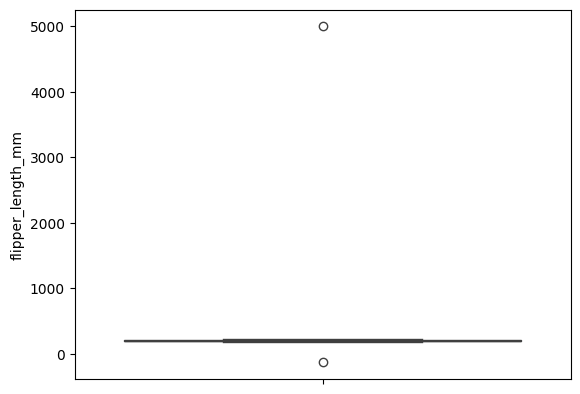

In [100]:
sns.boxplot(data, y = "flipper_length_mm")
plt.show()

In [101]:
data = data[(data.flipper_length_mm > 0) & (data.flipper_length_mm < 1000)]

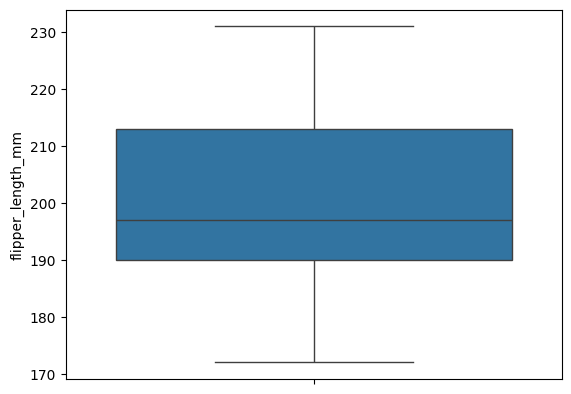

In [102]:
sns.boxplot(data, y = "flipper_length_mm")
plt.show()

In [103]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [104]:
#Nos molestan los categoricos para obtener el PCA, así que caambiamos a 0 y 1
data.loc[data.sex == "MALE", "sex"] = 0
data.loc[data.sex == "FEMALE", "sex"] = 1

In [105]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


In [106]:
data = data[data.sex.isin([0,1])]
#Eliminamos los que no cumplan con 0 y 1 comparamos columnas con el data anterior y nos damos cuenta de que perdimos 8 datos

In [107]:
X = data
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


In [108]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X))

In [ ]:
pca = PCA()
X = pd.DataFrame(pca.fit_transform(X))
# Ahora el PCA está como dataframe

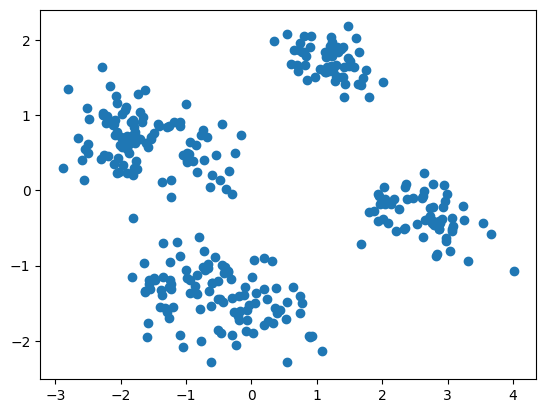

In [115]:
plt.scatter(X[0],X[1])
plt.show()